In [49]:
comparisons = [('clandinin', 'clandinin'), #intra
               ('murthy', 'murthy'),#intra
               ('clandinin_flip', 'clandinin_flip'),#intra
               ('murthy_flip', 'murthy_flip'),#intra
               ('clandinin', 'clandinin_flip'),#cross-hemi
               ('murthy', 'murthy_flip'),#cross-hemi
               ('clandinin', 'murthy'),#cross-lab
               ('clandinin', 'murthy_flip'),#cross-lab
               ('clandinin_flip', 'murthy'),#cross-lab
               ('clandinin_flip', 'murthy_flip'),#cross-lab
               ('clandinin', 'connectome'),#connectome
               ('clandinin_flip', 'connectome'),#connectome
               ('murthy', 'connectome'),#connectome
               ('murthy_flip', 'connectome')]#connectome

comparison_means = {}
comparison_std = {}
for comparison in comparisons:
    brain_type_1 = comparison[0]
    brain_type_2 = comparison[1]
    
    pairwise_diffs = []
    for axis in [0,1,2]:
        a=[i[axis] for i in centroids[brain_type_1]]
        b=[i[axis] for i in centroids[brain_type_2]]
        
        ### if it is an intra comparison, skip comparisons of exact same brains
        if brain_type_1 == brain_type_2:
            pairwise_diff = [np.abs((x-y)*.76) for i,x in enumerate(a) for j,y in enumerate(a) if i != j]
        else:
            pairwise_diff = [np.abs((x-y)*.76) for x in a for y in b]
        pairwise_diffs.append(pairwise_diff)
    
    ### calculate distances given all 3 axes
    distances = (np.asarray(pairwise_diffs[0])**2 +
             np.asarray(pairwise_diffs[1])**2 + 
             np.asarray(pairwise_diffs[2])**2)**0.5
    
    comparison_means[comparison] = np.mean(distances)
    comparison_std[comparison] = np.std(distances)

(0, 18)

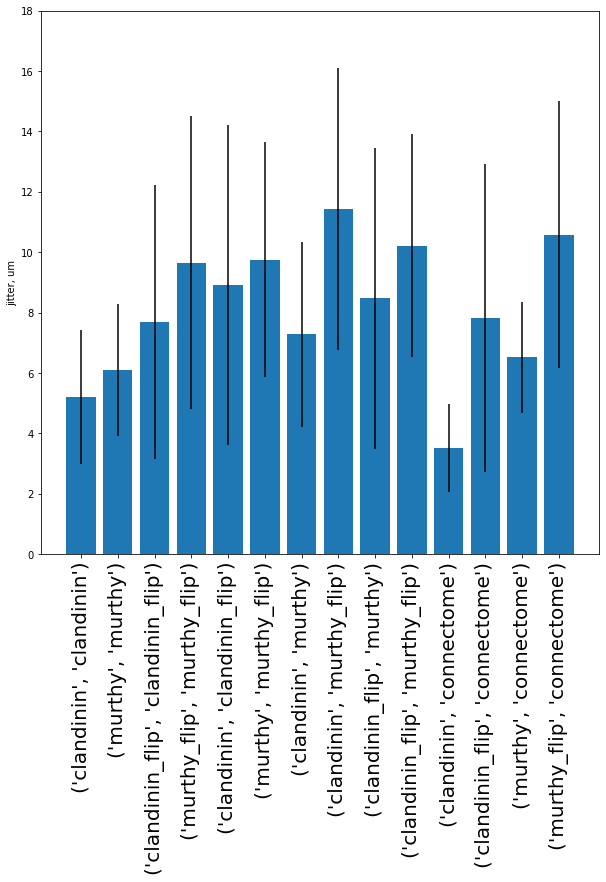

In [50]:
plt.figure(figsize=(10,10))
xs = list(range(len(comparisons)))
plt.bar([str(i) for i in comparisons], list(comparison_means.values()), yerr=list(comparison_std.values()))
plt.xticks(rotation=90,fontsize=20)
plt.ylabel("jitter, um")
plt.ylim(0,18)